In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import paleoscripts as ps

In [2]:
ds = xr.open_dataset("/nesi/nobackup/vuw03367/ka241/5001-5100/srnd_ka241.nc.gz")

In [3]:
# box size
lonmin, lonmax = 140, 155, # 130, 145 #140, 155
latmin, latmax = 0, 30

In [4]:
# regrid rnd to a higher resolution in box
rnd = ds.rnd.interp(longitude=np.linspace(lonmin, lonmax, 15),
                    latitude=np.linspace(latmin, latmax, 30))
# rnd = ds.rnd.sel(longitude=slice(lonmin, lonmax),
#                      latitude=slice(latmin, latmax))

In [5]:
rnd

<xarray.DataArray 'rnd' (year: 100, month: 12, latitude: 30, longitude: 15)>
array([[[[ 8.13721499,  8.52924451,  8.63898153, ...,  6.00572818,
           5.63885653,  5.27198488],
         [ 7.70013379,  7.99540299,  7.84595462, ...,  6.09985464,
           5.82160198,  5.54334933],
         [ 7.06260063,  7.26499564,  7.03459201, ...,  5.92661039,
           5.73390633,  5.54120226],
         ...,
         [ 4.9655754 ,  4.92705956,  4.73187003, ...,  4.1394706 ,
           4.16171947,  4.18396834],
         [ 5.24062557,  5.30639887,  5.18790185, ...,  4.97712943,
           4.99077906,  5.00442869],
         [ 5.51567574,  5.68573818,  5.64393367, ...,  5.81478826,
           5.81983865,  5.82488905]],

        [[ 3.51308004,  3.89440306,  4.26120271, ...,  5.97987297,
           5.76807159,  5.55627022],
         [ 2.69835599,  2.90570731,  3.25491793, ...,  7.51536424,
           7.36415608,  7.21294792],
         [ 2.21648277,  2.35574307,  2.80508104, ...,  8.48771242,
           8.35181681,  8.21592121],
...
         [ 6.12451041,  5.53565834,  5.15210818, ...,  2.72523582,
           2.82274163,  2.92024743],
         [ 6.54415653,  5.97753097,  5.48057326, ...,  2.83715246,
           2.87656382,  2.91597518],
         [ 6.96380265,  6.4194036 ,  5.80903835, ...,  2.9490691 ,
           2.93038602,  2.91170294]],

        [[ 5.19303636,  5.01431175,  4.66309247, ...,  2.84349218,
           2.62232511,  2.40115805],
         [ 3.53366371,  3.30301452,  3.12963488, ...,  3.10455065,
           2.92642977,  2.74830889],
         [ 2.49543922,  2.28015793,  2.25767321, ...,  3.54042512,
           3.44299795,  3.34557078],
         ...,
         [ 5.61944282,  5.71940238,  5.65794188, ...,  5.27717561,
           5.39973092,  5.52228623],
         [ 5.58041263,  5.7518164 ,  5.75903291, ...,  5.53640011,
           5.63858295,  5.7407658 ],
         [ 5.54138245,  5.78423043,  5.86012394, ...,  5.7956246 ,
           5.87743499,  5.95924537]]]])
Coordinates:
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * year       (year) int32 5001 5002 5003 5004 5005 ... 5097 5098 5099 5100
  * longitude  (longitude) float64 140.0 141.1 142.1 143.2 ... 152.9 153.9 155.0
  * latitude   (latitude) float64 0.0 1.034 2.069 3.103 ... 27.93 28.97 30.0
Attributes:
    long_name:  precipitation
    units:      mm/day

In [11]:
# season average across all the years
rnd_djf_mean = ps.extract_season(rnd, season='djf').mean(dim=['month', 'year'])  
rnd_djf_max = ps.extract_season(rnd, season='djf').max(dim=['month', 'year'])

In [12]:
# find the lon/lat points where the field is max
xy_mean = ps.find_points_where_field_is_extreme(rnd_djf_mean, extremum='max')
xy_max = ps.find_points_where_field_is_extreme(rnd_djf_max, extremum='max')

In [13]:
# compute the line that goes across the points
fit_mean = ps.linear_regression_coeffs(xy_mean, cooks_tol=4)
fit_max = ps.linear_regression_coeffs(xy_max, cooks_tol=4)

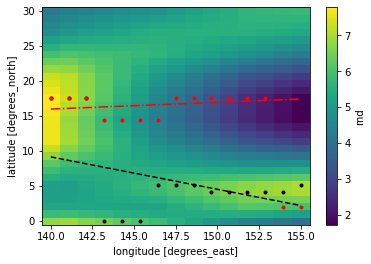

In [15]:
rnd_djf.plot()
xs = np.array([lonmin, lonmax])
ys_mean = fit_mean.intercept + fit_mean.slope * xs
ys_max = fit_max.intercept + fit_max.slope * xs
plt.plot(xs, ys_mean, 'k--')
plt.plot(xs, ys_max, 'r-.')
plt.plot(xy_mean[:,0], xy_mean[:, 1], 'k.')
plt.plot(xy_max[:,0], xy_max[:, 1], 'r.')
plt.show()